In [36]:
graphics_toolkit("gnuplot"); % use if "plot" does not work

## Finite element method (FEM) in 1d
Solve the following 1d diffusion boundary value problem using linear finite elements and compare with analytical solution.

In [45]:
%% boundary value problem
%   -k1*u1''(x)=f   in (0,M)
%   -k2*u2''(x)=f   in (M,L)
%   u1(0)=U
%   -k2*u2'(L)=T
%   u1(M)=u2(M)
%   k1*u1'(M+)=k2*u2'(M-)

k1=1;
k2=2;
f=-0.1;
L=1;
M=0.5;
U=0;
T=0;

Preparation of the discretization and material inputs (similar structure will be used in 2d FEM):

In [52]:
%% preparation
N=11;   % number of intervals of the discretization
NODES=linspace(0,L,N+1)'; % all points (matrix of size (N+1)*dim)
n_NODES=size(NODES,1); % number of nodes of the discretization
ELEMENTS=[(1:n_NODES-1)' (2:n_NODES)']; % matrix of INDICES of elements
n_ELEMENTS=size(ELEMENTS,1); % number of elements (equals N in 1d)
DBOUNDARY=[1]; % vector of indices of Dirichlet boundary nodes
DVALUE=[U]; % Dirichlet values in this boundary nodes
FREENODE=true(n_NODES,1); FREENODE(DBOUNDARY)=false; % vector of indices of nodes without D. b. c.
NBOUNDARY=[n_NODES]; % vector of indices of Neumann boundary nodes
NVALUE=[T]; % Neumann values in this boundary nodes
LENGTHS=NODES(ELEMENTS(:,2))-NODES(ELEMENTS(:,1)); % vector of legths of all elements
MATERIALS=k1*ones(n_ELEMENTS,1); % vector of material values at each element
CENTERS=sum(NODES(ELEMENTS),2)/2; % coordinates of centers of all elements
MATERIALS(CENTERS>M)=k2;
MATERIALS((end+1)/2)=(k1+k2)/2;
F=f*ones(n_ELEMENTS,1); % vector of source function values at each element

In [53]:
MATERIALS

MATERIALS =

   1.0000
   1.0000
   1.0000
   1.0000
   1.0000
   1.5000
   2.0000
   2.0000
   2.0000
   2.0000
   2.0000



Construct FEM matrix and right hand side vector using local matrices and vectors:

In [54]:
%% local matrix and rhs
A_local=[1 -1; -1 1];   % local matrix 2x2
b_local=[1/2; 1/2];     % local r. h. s. 2x1

%% global matrix and rhs
A=zeros(n_NODES);
b=zeros(n_NODES,1);
for i=1:n_ELEMENTS
    A(ELEMENTS(i,:),ELEMENTS(i,:))=A(ELEMENTS(i,:),ELEMENTS(i,:))+A_local*MATERIALS(i)/LENGTHS(i);
    b(ELEMENTS(i,:))=b(ELEMENTS(i,:))+b_local*F(i)*LENGTHS(i);
end

Eliminate unknowns corresponding to Dirichlet nodes, modify the r. h. s. vector according to Neumann boundary conditions, and solve the resulting linear system:

In [55]:
%% boundary conditions
u=zeros(n_NODES,1);
u(~FREENODE)=DVALUE;
b=b-A*u;
b(NBOUNDARY)=b(NBOUNDARY)-NVALUE;
u(FREENODE)=A(FREENODE,FREENODE)\b(FREENODE);

It remains to plot the solution and compare to analytical solution:

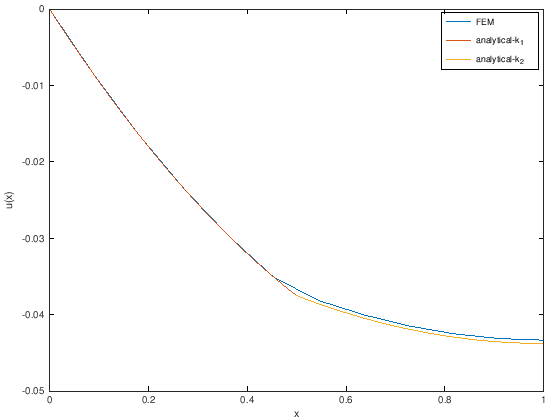

In [56]:
figure; 
plot(NODES,u); hold on

%% analytical solution
C2=U;
D1=(f*L-T)/k2;
C1=D1*k2/k1;
D2=-f/(2*k1)*M^2+C1*M+C2+f/(2*k2)*M^2-D1*M;
u1=@(x)-f/(2*k1)*x.^2+C1*x+C2;
u2=@(x)-f/(2*k2)*x.^2+D1*x+D2;
x1=linspace(0,M,100); x2=linspace(M,L,100); % points of visualization
hold on; plot(x1,u1(x1)); plot(x2,u2(x2))   % plot of the analytical solution
legend('FEM','analytical-k_1','analytical-k_2');
xlabel('x');
ylabel('u(x)');

## Other tasks:
1) Can we use a discretization that has not a node in the point of the interface?